In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from pathlib import Path

# Add src directory to sys.path to import config
# This assumes the notebook is in RECSYS_FINAL/notebooks/
project_root = Path.cwd().parent # Should be RECSYS_FINAL
src_path = project_root / "src"
sys.path.append(str(src_path))

# Import config variables
import config

# Set some display options for pandas
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

# Plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print(f"Project Root: {project_root}")
print(f"Configured Raw Data Path: {config.RAW_DATA_DIR}")
print(f"All Raw Files Found: {config.check_raw_data_exists()}")

Loading .env from: /Users/mohit/Desktop/everything/ATLAS/Semester 4/Pinnacle/recsys_final/.env
Database URI configured: Yes
Project Root: /Users/mohit/Desktop/everything/ATLAS/Semester 4/Pinnacle/recsys_final
Configured Raw Data Path: /Users/mohit/Desktop/everything/ATLAS/Semester 4/Pinnacle/recsys_final/data/raw
All raw data files found.
All Raw Files Found: True


In [2]:
# Load all datasets using paths from config
try:
    assessments_df = pd.read_csv(config.ASSESSMENTS_CSV)
    courses_df = pd.read_csv(config.COURSES_CSV)
    student_assessment_df = pd.read_csv(config.STUDENT_ASSESSMENT_CSV)
    student_info_df = pd.read_csv(config.STUDENT_INFO_CSV)
    student_registration_df = pd.read_csv(config.STUDENT_REGISTRATION_CSV)
    student_vle_df = pd.read_csv(config.STUDENT_VLE_CSV)
    vle_df = pd.read_csv(config.VLE_CSV)
    print("All CSV files loaded successfully.")
except FileNotFoundError as e:
    print(f"Error loading files: {e}")
    print("Please ensure the CSV files are in the data/raw/ directory.")
    # Stop execution or handle appropriately

# Store dataframes in a dictionary for easier access
dataframes = {
    "assessments": assessments_df,
    "courses": courses_df,
    "student_assessment": student_assessment_df,
    "student_info": student_info_df,
    "student_registration": student_registration_df,
    "student_vle": student_vle_df,
    "vle": vle_df,
}

All CSV files loaded successfully.


In [3]:
# Basic inspection of each dataframe
for name, df in dataframes.items():
    print(f"--- DataFrame: {name} ---")
    print(f"Shape: {df.shape}")
    print("Info:")
    df.info()
    print("\nHead:")
    print(df.head())
    print("\nMissing Values:")
    print(df.isnull().sum())
    # Only show describe() for dataframes with numerical columns
    numeric_cols = df.select_dtypes(include=np.number).columns
    if len(numeric_cols) > 0:
         print("\nDescribe (Numerical):")
         print(df.describe())
    # Describe categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    if len(categorical_cols) > 0:
        print("\nDescribe (Categorical):")
        print(df.describe(include=['object', 'category']))
    print("-" * (len(name) + 22))
    print("\n")

--- DataFrame: assessments ---
Shape: (206, 6)
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB

Head:
  code_module code_presentation  id_assessment assessment_type   date  weight
0         AAA             2013J           1752             TMA   19.0    10.0
1         AAA             2013J           1753             TMA   54.0    20.0
2         AAA             2013J           1754             TMA  117.0    20.0
3         AAA             2013J           1755             TMA  166.0    20.0


--- Analyzing student_info ---


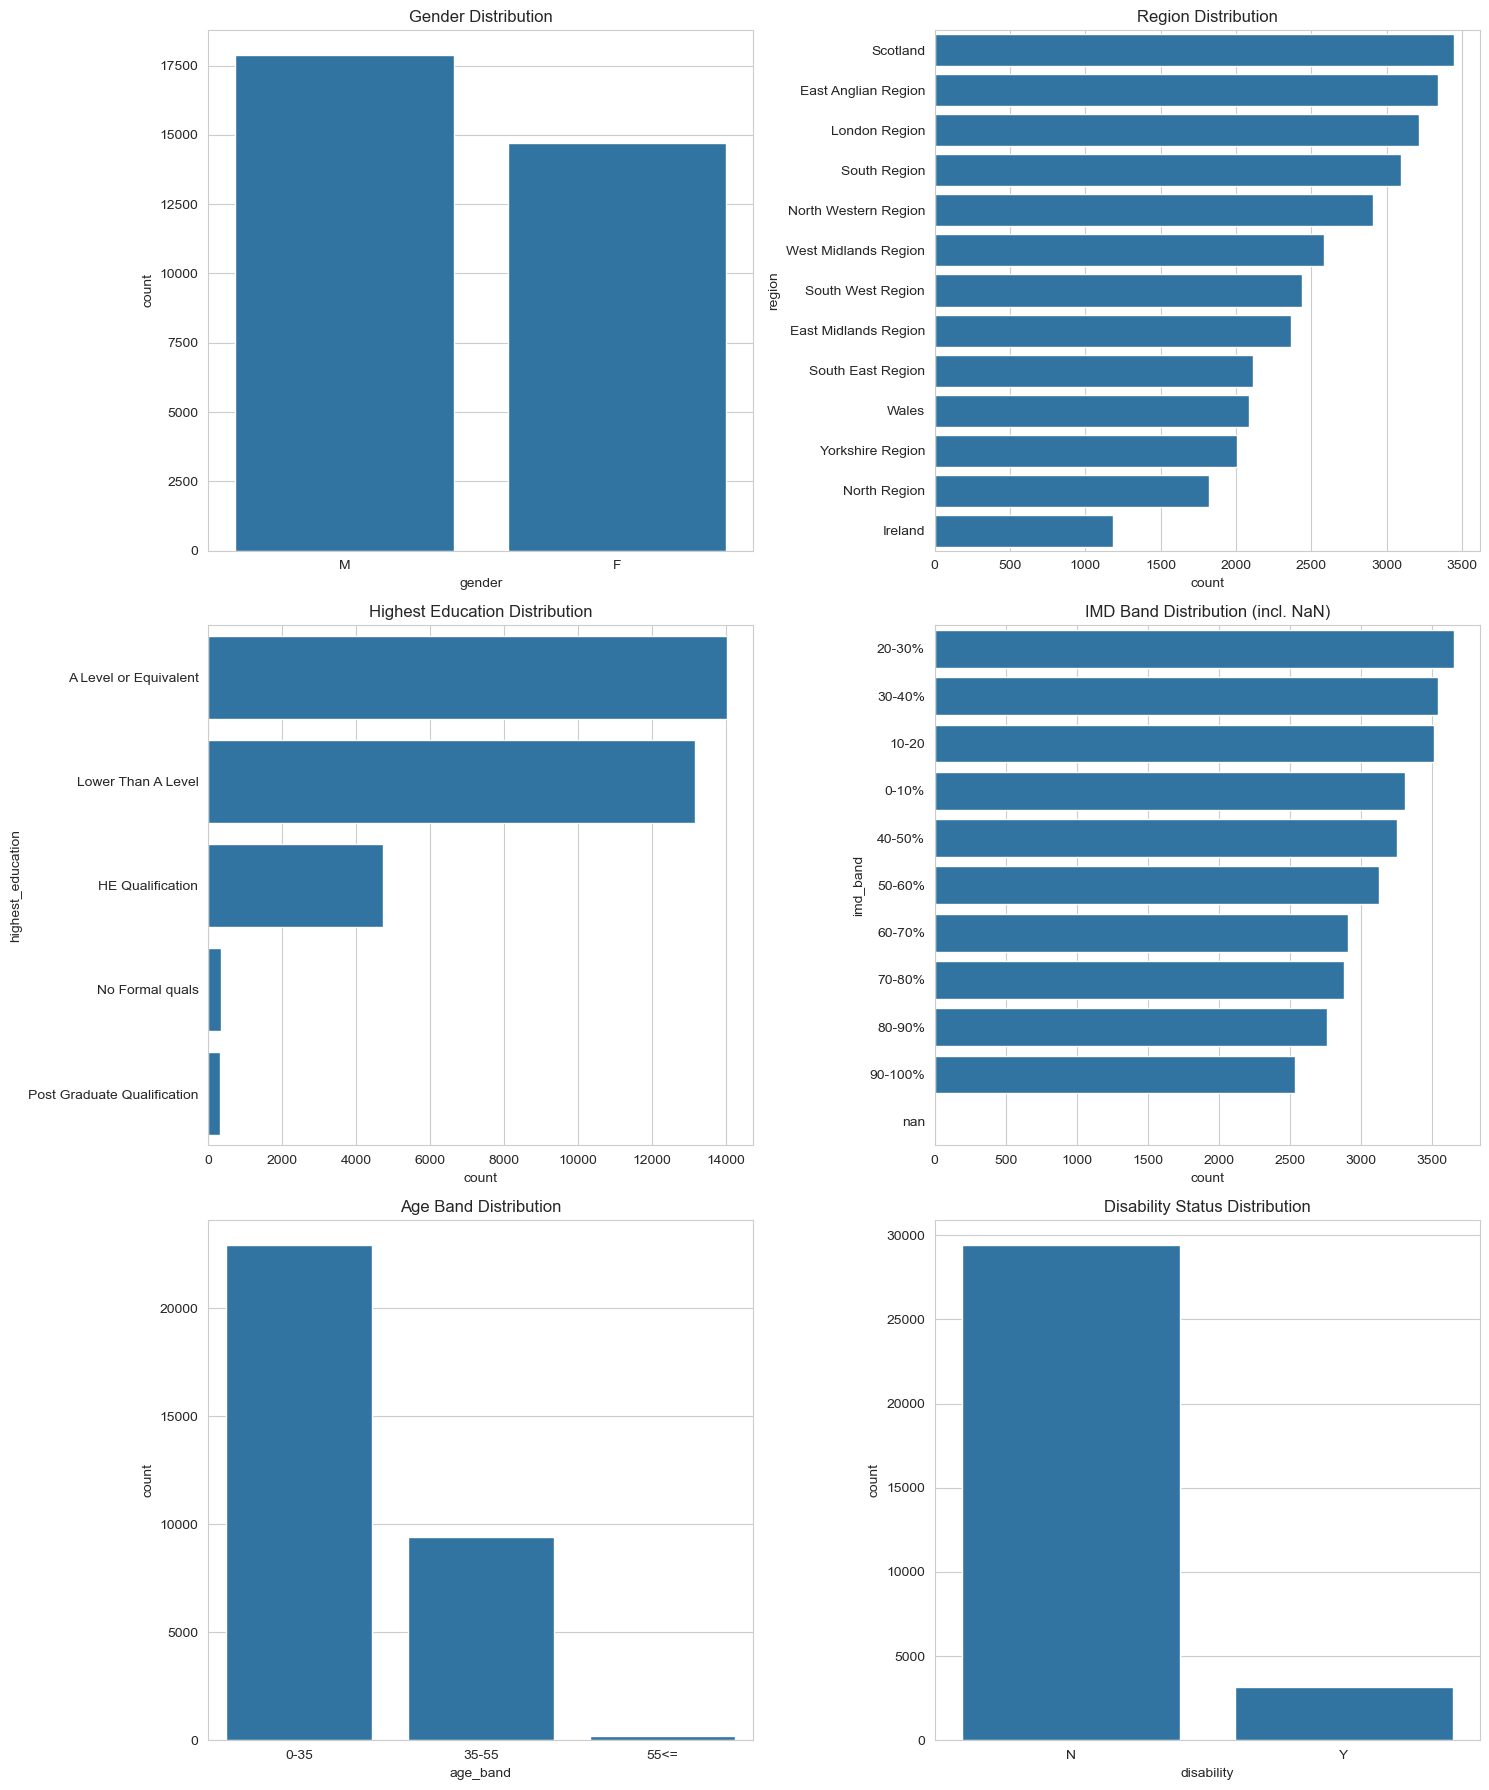


Previous Attempts Distribution:


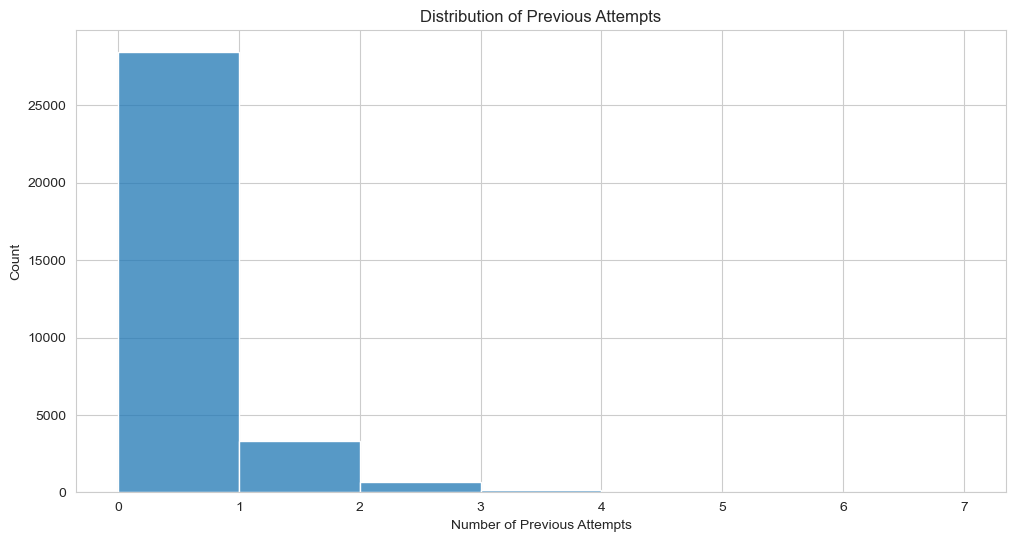


Studied Credits Distribution:


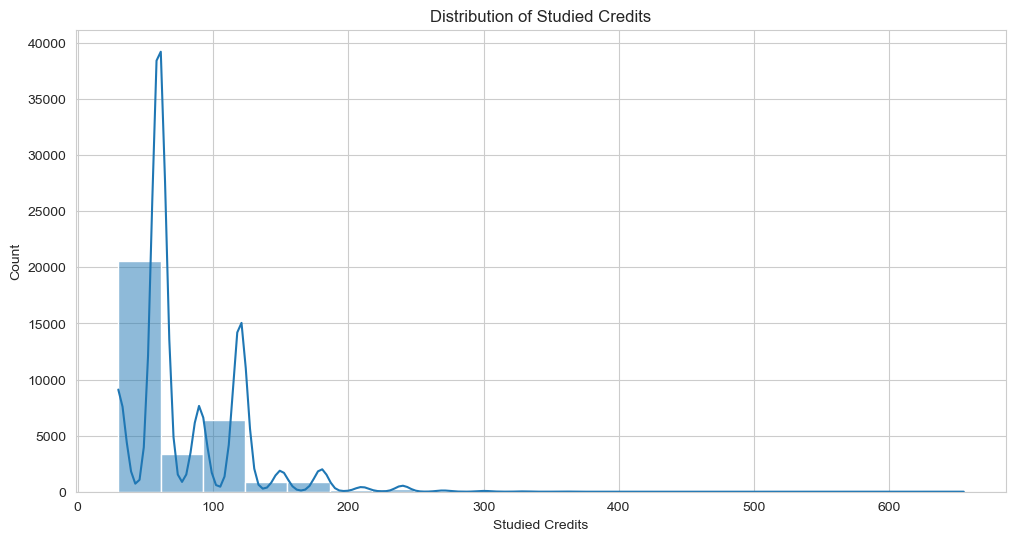


Final Result Distribution:


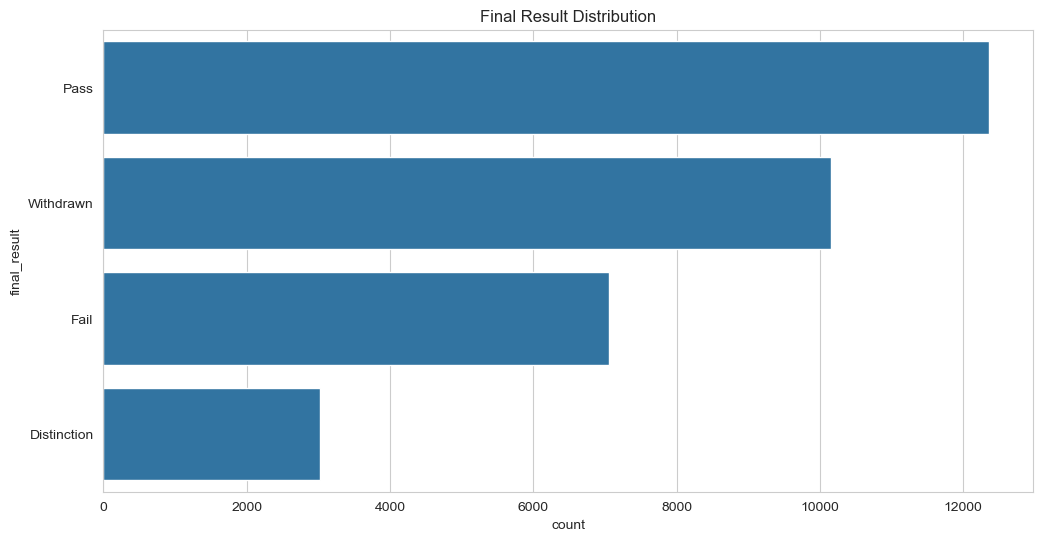

In [4]:
print("--- Analyzing student_info ---")
student_info = dataframes['student_info']

# Distributions of categorical features
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
sns.countplot(ax=axes[0, 0], x='gender', data=student_info)
axes[0, 0].set_title('Gender Distribution')

sns.countplot(ax=axes[0, 1], y='region', data=student_info, order=student_info['region'].value_counts().index)
axes[0, 1].set_title('Region Distribution')

sns.countplot(ax=axes[1, 0], y='highest_education', data=student_info, order=student_info['highest_education'].value_counts().index)
axes[1, 0].set_title('Highest Education Distribution')

sns.countplot(ax=axes[1, 1], y='imd_band', data=student_info, order=student_info['imd_band'].value_counts(dropna=False).index) # Show NaNs
axes[1, 1].set_title('IMD Band Distribution (incl. NaN)')

sns.countplot(ax=axes[2, 0], x='age_band', data=student_info, order=student_info['age_band'].value_counts().index)
axes[2, 0].set_title('Age Band Distribution')

sns.countplot(ax=axes[2, 1], x='disability', data=student_info)
axes[2, 1].set_title('Disability Status Distribution')

plt.tight_layout()
plt.show()

# Explore numerical features
print("\nPrevious Attempts Distribution:")
sns.histplot(student_info['num_of_prev_attempts'], bins=range(student_info['num_of_prev_attempts'].max() + 2), kde=False)
plt.title('Distribution of Previous Attempts')
plt.xlabel('Number of Previous Attempts')
plt.ylabel('Count')
plt.show()

print("\nStudied Credits Distribution:")
sns.histplot(student_info['studied_credits'], bins=20, kde=True)
plt.title('Distribution of Studied Credits')
plt.xlabel('Studied Credits')
plt.ylabel('Count')
plt.show()

# Check final result distribution
print("\nFinal Result Distribution:")
sns.countplot(y='final_result', data=student_info, order=student_info['final_result'].value_counts().index)
plt.title('Final Result Distribution')
plt.show()

--- Analyzing courses ---
Number of unique modules: 7
Number of unique presentations: 22

Modules and their number of presentations:
code_module
BBB    4
DDD    4
FFF    4
EEE    3
GGG    3
AAA    2
CCC    2
Name: count, dtype: int64

Distribution of Module Presentation Lengths:


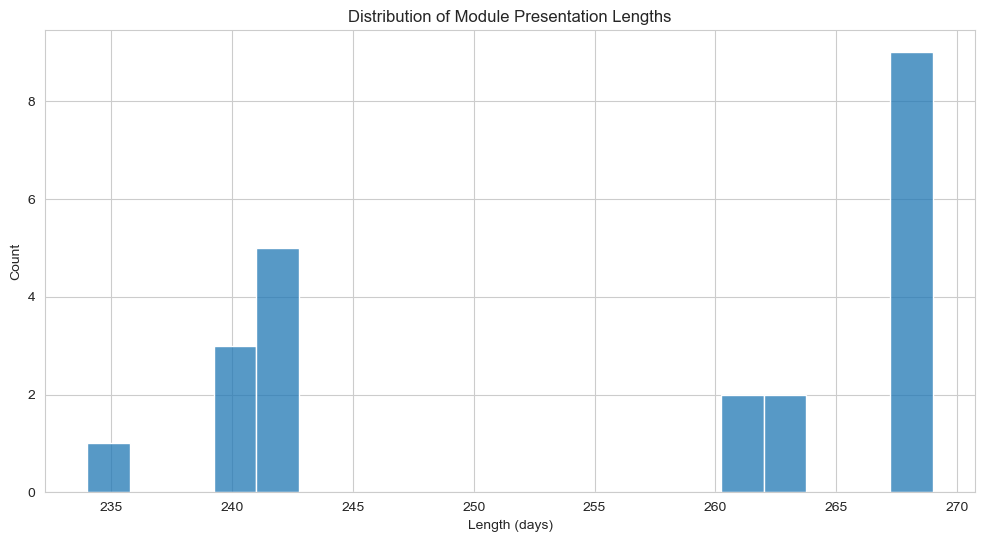


Check unique presentation IDs: 22 (should match shape[0])


In [5]:
print("--- Analyzing courses ---")
courses = dataframes['courses']

print(f"Number of unique modules: {courses['code_module'].nunique()}")
print(f"Number of unique presentations: {courses.shape[0]}") # Each row is a presentation
print("\nModules and their number of presentations:")
print(courses['code_module'].value_counts())

print("\nDistribution of Module Presentation Lengths:")
sns.histplot(courses['module_presentation_length'], bins=20, kde=False)
plt.title('Distribution of Module Presentation Lengths')
plt.xlabel('Length (days)')
plt.ylabel('Count')
plt.show()

# Create presentation_id for later use (might do this again in preprocessing)
courses['presentation_id'] = courses['code_module'] + '_' + courses['code_presentation']
print(f"\nCheck unique presentation IDs: {courses['presentation_id'].nunique()} (should match shape[0])")

--- Analyzing student_registration ---

Duplicate registrations (same student, same presentation): 0

Distribution of Registration Dates:


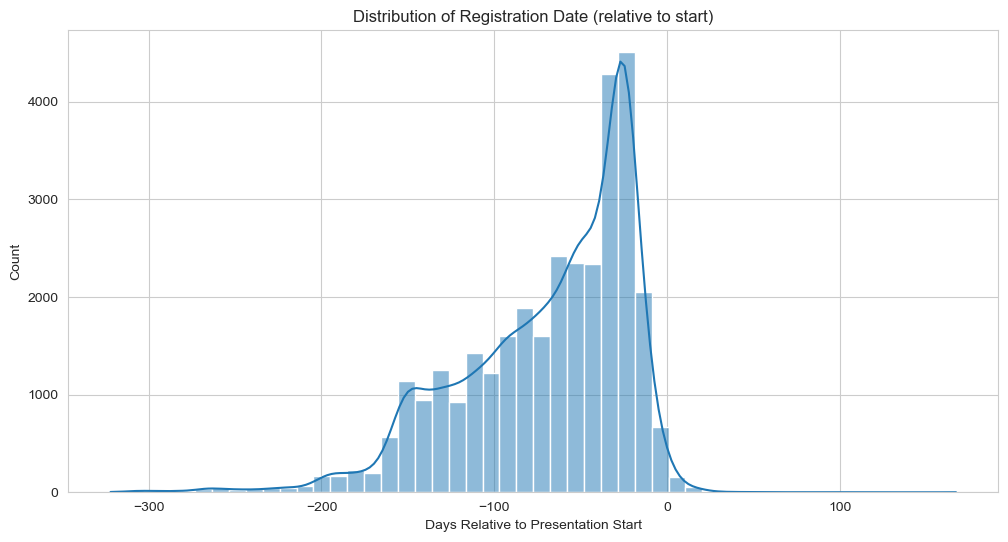


Distribution of Unregistration Dates:


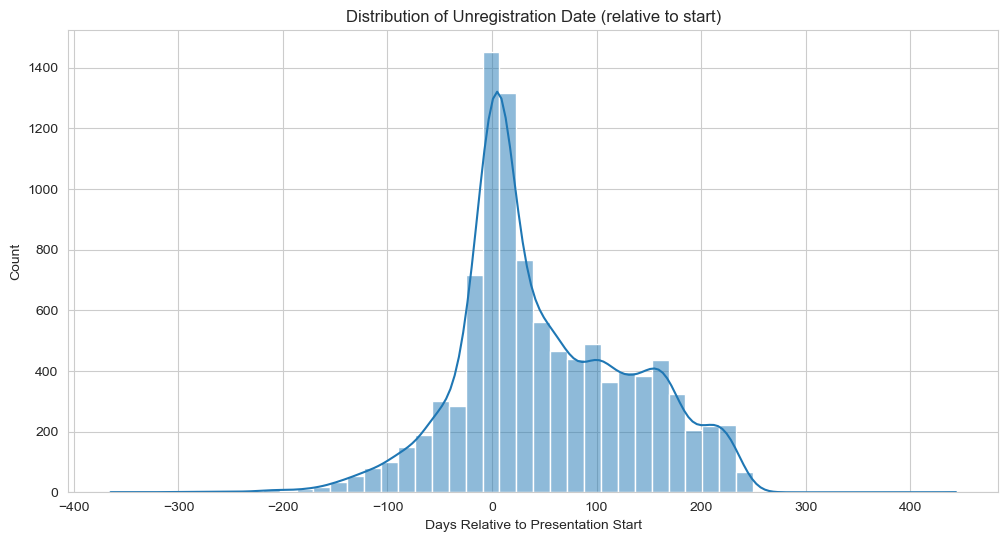


Percentage of registrations with an unregistration date: 30.90%


In [6]:
print("--- Analyzing student_registration ---")
student_reg = dataframes['student_registration']

# Check for multiple registrations per student per presentation (should be unique ideally)
reg_duplicates = student_reg.duplicated(subset=['id_student', 'code_module', 'code_presentation']).sum()
print(f"\nDuplicate registrations (same student, same presentation): {reg_duplicates}")

# Distribution of registration dates (relative to presentation start, which is 0)
print("\nDistribution of Registration Dates:")
sns.histplot(student_reg['date_registration'].dropna(), bins=50, kde=True)
plt.title('Distribution of Registration Date (relative to start)')
plt.xlabel('Days Relative to Presentation Start')
plt.ylabel('Count')
plt.show()
# Note: Negative values mean registered before start, positive after.

# Distribution of unregistration dates
print("\nDistribution of Unregistration Dates:")
sns.histplot(student_reg['date_unregistration'].dropna(), bins=50, kde=True)
plt.title('Distribution of Unregistration Date (relative to start)')
plt.xlabel('Days Relative to Presentation Start')
plt.ylabel('Count')
plt.show()

print(f"\nPercentage of registrations with an unregistration date: \
{student_reg['date_unregistration'].notnull().mean() * 100:.2f}%")

--- Analyzing student_vle ---
Total interaction records: 10655280
Unique students in VLE logs: 26074
Unique VLE items interacted with: 6268

Distribution of Interaction Dates (relative to start):


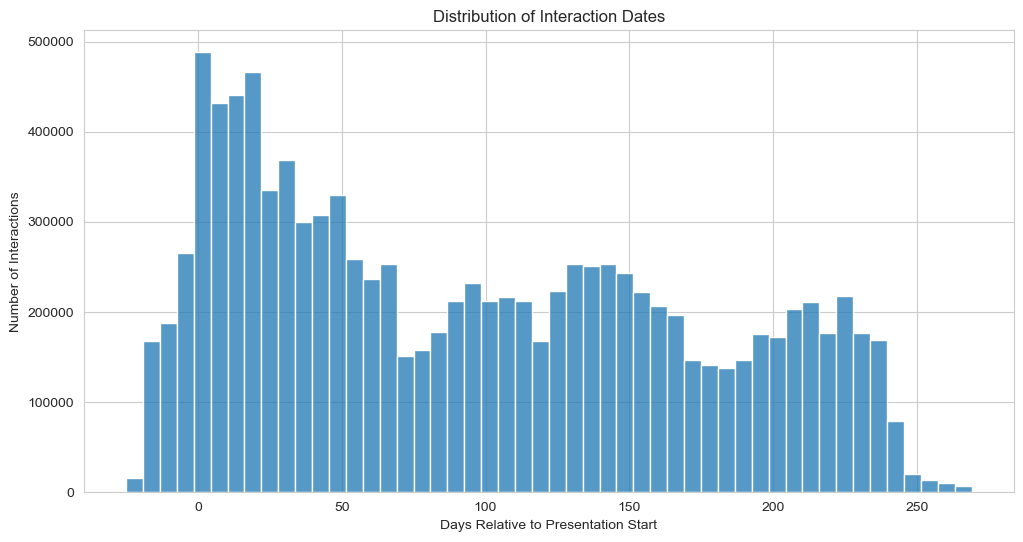


Distribution of Clicks per Interaction Record:
count    1.065528e+07
mean     3.716946e+00
std      8.849047e+00
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
90%      8.000000e+00
95%      1.200000e+01
99%      3.400000e+01
max      6.977000e+03
Name: sum_click, dtype: float64


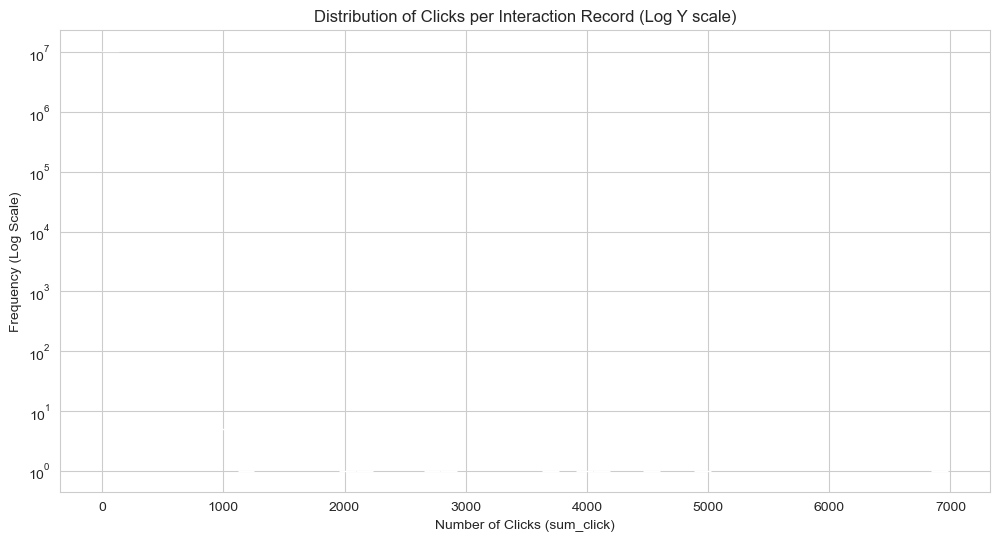


Interactions per Student (Summary Stats):
count    26074.000000
mean       408.655365
std        430.608121
min          1.000000
25%        108.000000
50%        270.000000
75%        570.000000
max       6389.000000
dtype: float64


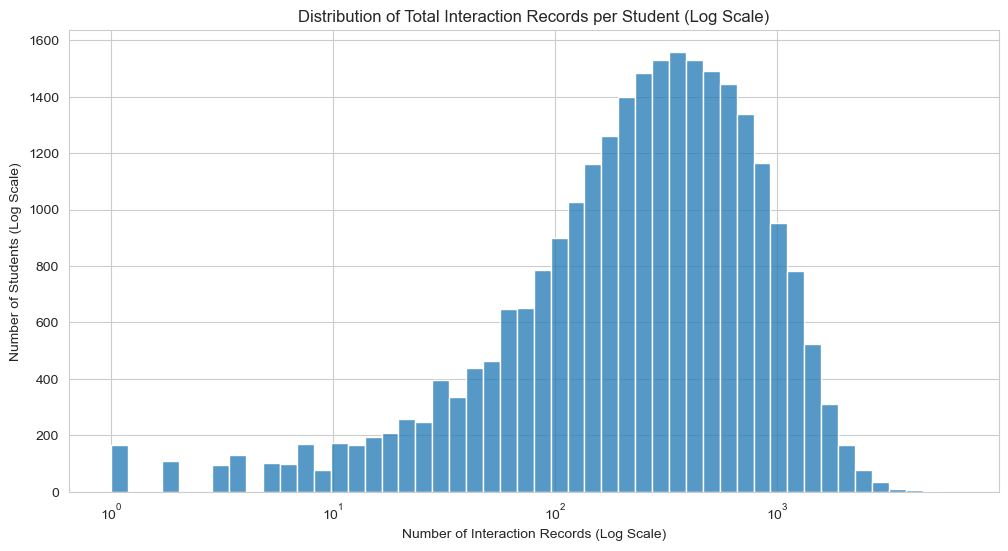


Total Clicks per Student (Summary Stats):
count    26074.000000
mean      1518.949873
std       1935.994635
min          1.000000
25%        298.000000
50%        824.000000
75%       2018.000000
max      28615.000000
Name: sum_click, dtype: float64


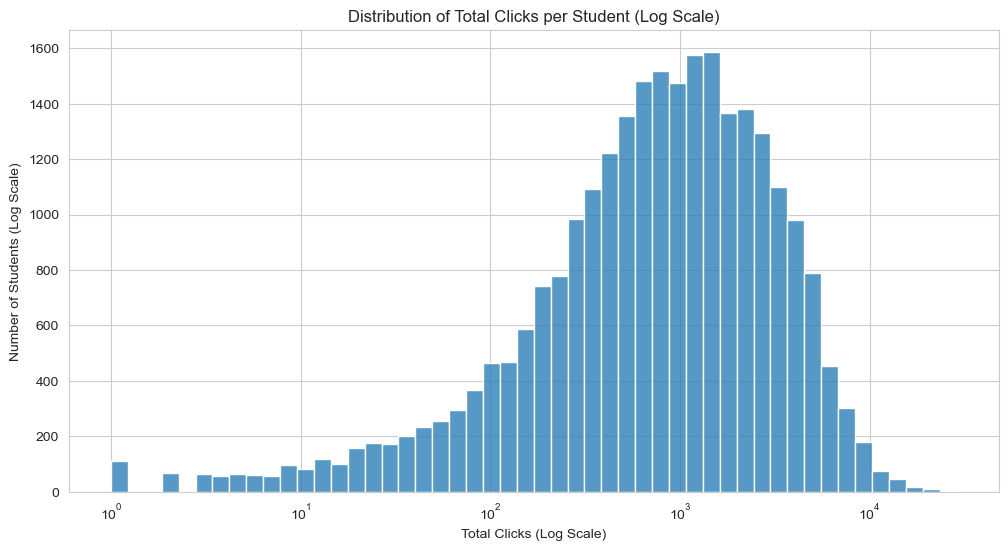

In [7]:
print("--- Analyzing student_vle ---")
student_vle = dataframes['student_vle']

print(f"Total interaction records: {student_vle.shape[0]}")
print(f"Unique students in VLE logs: {student_vle['id_student'].nunique()}")
print(f"Unique VLE items interacted with: {student_vle['id_site'].nunique()}")

# Distribution of interaction dates
print("\nDistribution of Interaction Dates (relative to start):")
sns.histplot(student_vle['date'], bins=50, kde=False)
plt.title('Distribution of Interaction Dates')
plt.xlabel('Days Relative to Presentation Start')
plt.ylabel('Number of Interactions')
plt.show()

# Distribution of sum_click
# Handle potential outliers by looking at quantiles
print("\nDistribution of Clicks per Interaction Record:")
print(student_vle['sum_click'].describe(percentiles=[.25, .5, .75, .9, .95, .99]))
# Plotting might be skewed, consider log scale or capping
sns.histplot(student_vle['sum_click'], bins=50, log_scale=(False, True)) # Log scale for y-axis
plt.title('Distribution of Clicks per Interaction Record (Log Y scale)')
plt.xlabel('Number of Clicks (sum_click)')
plt.ylabel('Frequency (Log Scale)')
plt.show()

# Interactions per student (across all their registered courses)
interactions_per_student = student_vle.groupby('id_student').size()
print("\nInteractions per Student (Summary Stats):")
print(interactions_per_student.describe())
sns.histplot(interactions_per_student, bins=50, log_scale=True)
plt.title('Distribution of Total Interaction Records per Student (Log Scale)')
plt.xlabel('Number of Interaction Records (Log Scale)')
plt.ylabel('Number of Students (Log Scale)')
plt.show()

# Clicks per student
clicks_per_student = student_vle.groupby('id_student')['sum_click'].sum()
print("\nTotal Clicks per Student (Summary Stats):")
print(clicks_per_student.describe())
sns.histplot(clicks_per_student, bins=50, log_scale=True)
plt.title('Distribution of Total Clicks per Student (Log Scale)')
plt.xlabel('Total Clicks (Log Scale)')
plt.ylabel('Number of Students (Log Scale)')
plt.show()

--- Analyzing vle ---
Total VLE items defined: 6364
Unique VLE item IDs (id_site): 6364

Distribution of VLE Activity Types:


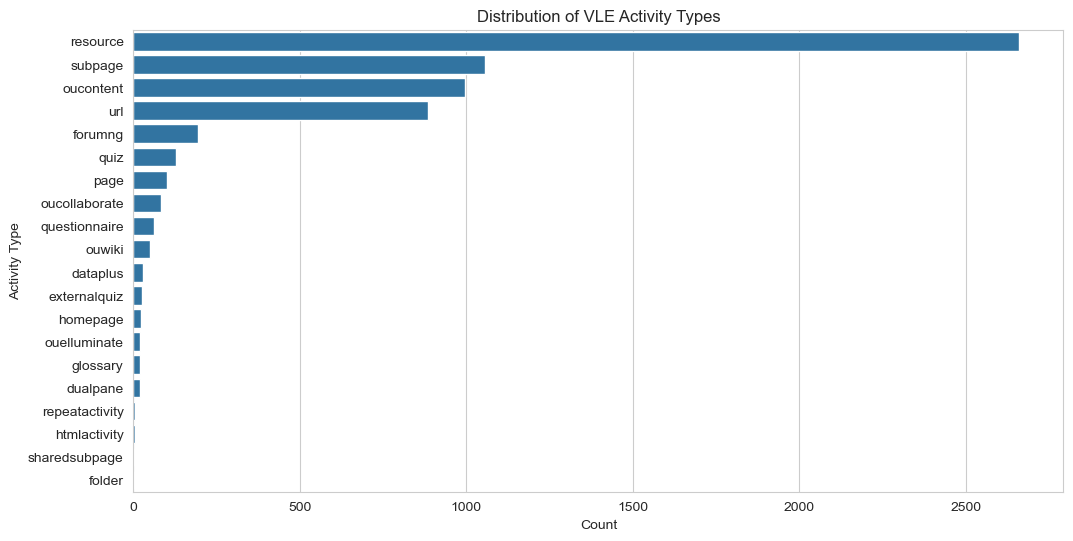


Percentage of VLE items with 'week_from': 17.61%
Percentage of VLE items with 'week_to': 17.61%


In [8]:
print("--- Analyzing vle ---")
vle = dataframes['vle']

print(f"Total VLE items defined: {vle.shape[0]}")
print(f"Unique VLE item IDs (id_site): {vle['id_site'].nunique()}") # Should match shape[0]

# Distribution of activity types
print("\nDistribution of VLE Activity Types:")
activity_counts = vle['activity_type'].value_counts()
sns.barplot(y=activity_counts.index, x=activity_counts.values)
plt.title('Distribution of VLE Activity Types')
plt.xlabel('Count')
plt.ylabel('Activity Type')
plt.show()

# Weeks - presence of week_from/week_to
print(f"\nPercentage of VLE items with 'week_from': {vle['week_from'].notnull().mean()*100:.2f}%")
print(f"Percentage of VLE items with 'week_to': {vle['week_to'].notnull().mean()*100:.2f}%")

--- Analyzing assessments & student_assessment ---
Total assessments defined: 206
Unique assessment IDs: 206

Distribution of Assessment Types:


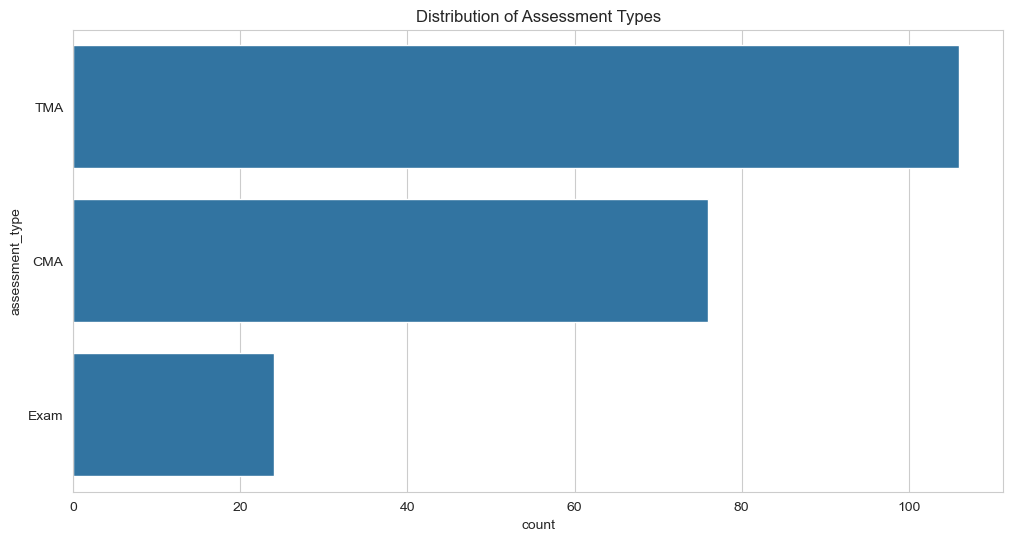

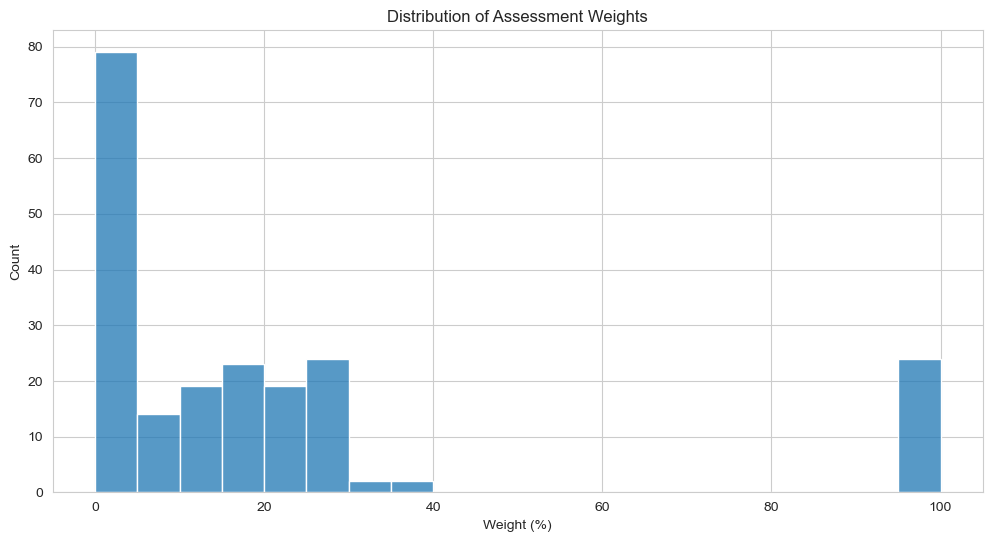


Distribution of Student Scores:
count    173739.000000
mean         75.799573
std          18.798107
min           0.000000
25%          65.000000
50%          80.000000
75%          90.000000
max         100.000000
Name: score, dtype: float64


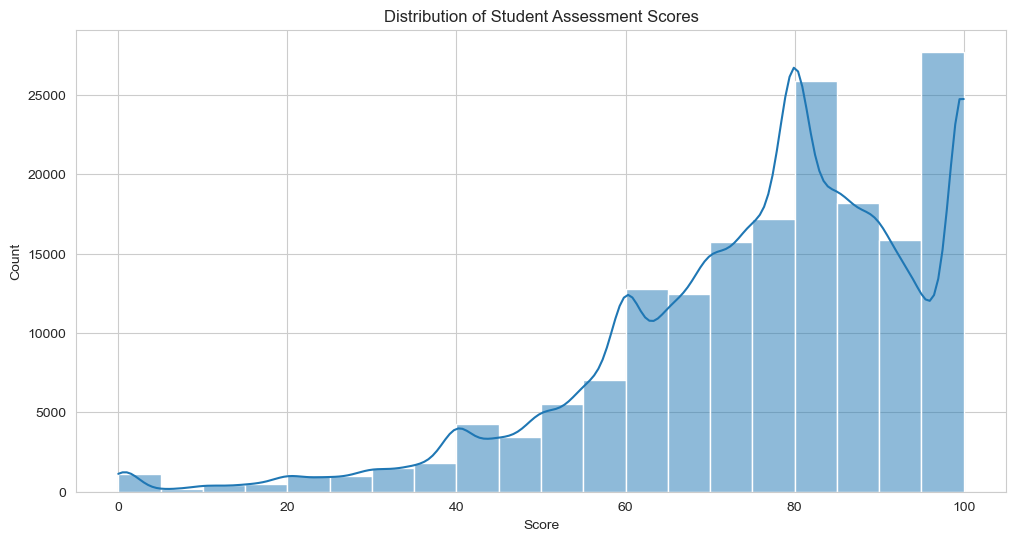


Pass Rate (based on score >= 40):
passed
True     0.955431
False    0.044569
Name: proportion, dtype: float64

Distribution of Submission Time Relative to Deadline:
count    171047.000000
mean         16.657989
std          45.945880
min        -372.000000
25%          -2.000000
50%           1.000000
75%           6.000000
max         246.000000
Name: days_early, dtype: float64


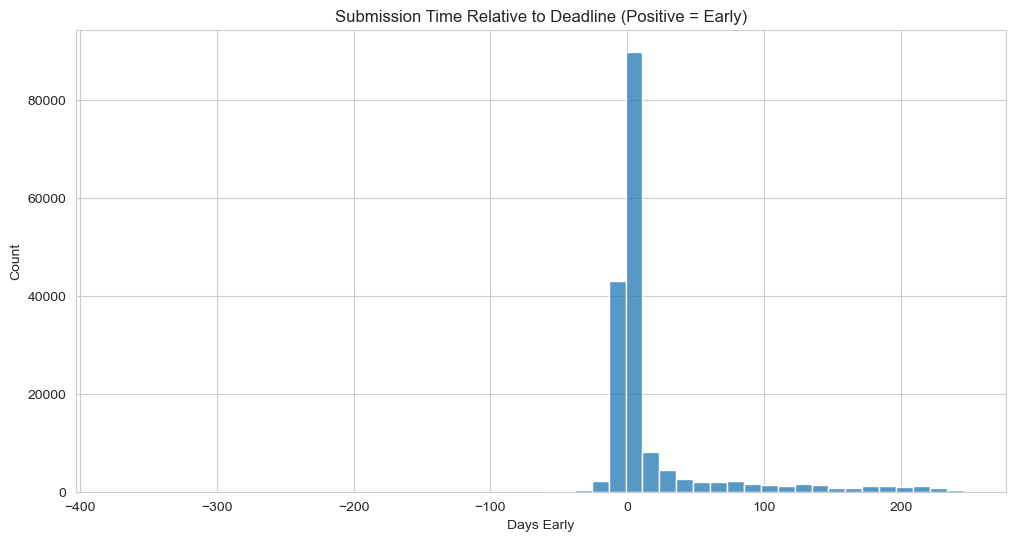

In [9]:
print("--- Analyzing assessments & student_assessment ---")
assessments = dataframes['assessments']
student_assessment = dataframes['student_assessment']

print(f"Total assessments defined: {assessments.shape[0]}")
print(f"Unique assessment IDs: {assessments['id_assessment'].nunique()}") # Should match shape[0]

# Assessment types
print("\nDistribution of Assessment Types:")
sns.countplot(y='assessment_type', data=assessments, order=assessments['assessment_type'].value_counts().index)
plt.title('Distribution of Assessment Types')
plt.show()

# Distribution of assessment weights
sns.histplot(assessments['weight'], bins=20, kde=False)
plt.title('Distribution of Assessment Weights')
plt.xlabel('Weight (%)')
plt.ylabel('Count')
plt.show()

# Explore student scores
print("\nDistribution of Student Scores:")
print(student_assessment['score'].describe())
sns.histplot(student_assessment['score'].dropna(), bins=20, kde=True)
plt.title('Distribution of Student Assessment Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

# Pass/Fail based on score >= 40 (common threshold)
student_assessment['passed'] = student_assessment['score'] >= 40
print("\nPass Rate (based on score >= 40):")
print(student_assessment['passed'].value_counts(normalize=True))

# Submission relative to deadline
assessments_renamed = assessments.rename(columns={'date': 'deadline'})
student_assessment_merged = pd.merge(
    student_assessment,
    assessments_renamed[['id_assessment', 'deadline']],
    on='id_assessment',
    how='left'
)
student_assessment_merged['days_early'] = student_assessment_merged['deadline'] - student_assessment_merged['date_submitted']

print("\nDistribution of Submission Time Relative to Deadline:")
print(student_assessment_merged['days_early'].describe())
sns.histplot(student_assessment_merged['days_early'].dropna(), bins=50)
plt.title('Submission Time Relative to Deadline (Positive = Early)')
plt.xlabel('Days Early')
plt.ylabel('Count')
plt.show()


Average Assessment Score by Highest Education:
highest_education
No Formal quals                70.601852
Lower Than A Level             73.677280
A Level or Equivalent          75.825197
HE Qualification               77.550154
Post Graduate Qualification    83.489118
Name: score, dtype: float64


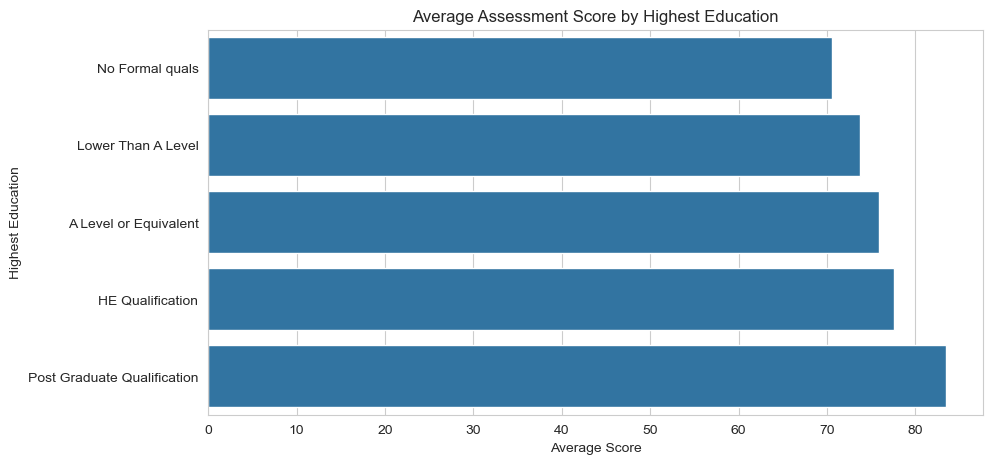

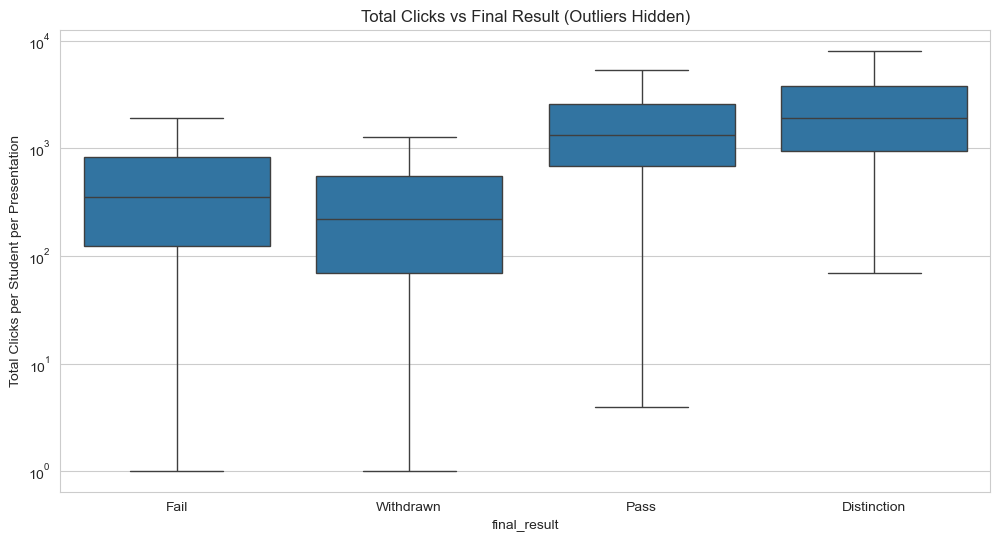

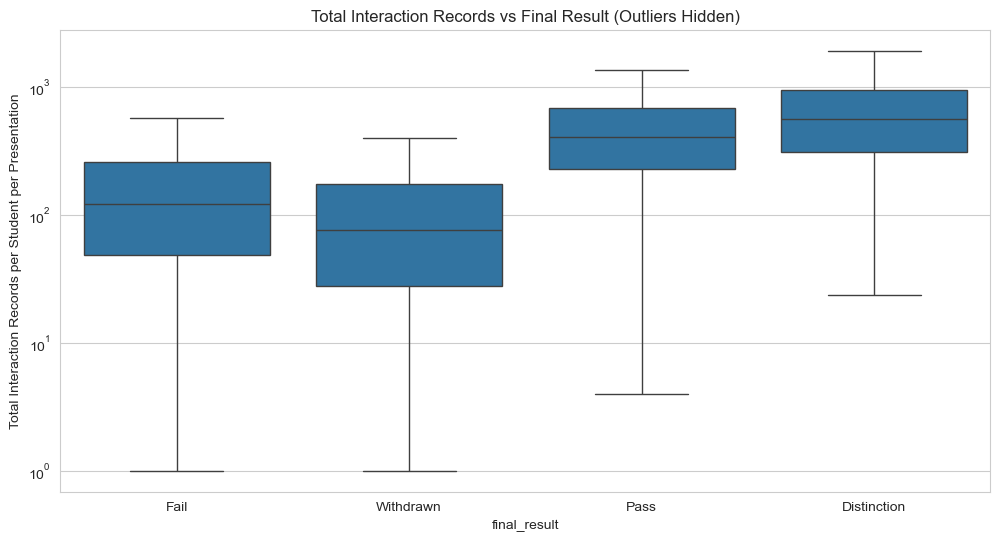

In [10]:
# Example: Average score per highest education level
student_info_subset = student_info[['id_student', 'highest_education']]
student_scores_merged = pd.merge(student_assessment, student_info_subset, on='id_student')

avg_score_by_edu = student_scores_merged.groupby('highest_education')['score'].mean().sort_values()

print("\nAverage Assessment Score by Highest Education:")
print(avg_score_by_edu)

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_score_by_edu.values, y=avg_score_by_edu.index)
plt.title('Average Assessment Score by Highest Education')
plt.xlabel('Average Score')
plt.ylabel('Highest Education')
plt.show()

# Example: Interactions vs Final Result
student_interactions = student_vle.groupby(['id_student', 'code_module', 'code_presentation']).size().reset_index(name='total_interactions')
student_clicks = student_vle.groupby(['id_student', 'code_module', 'code_presentation'])['sum_click'].sum().reset_index(name='total_clicks')

student_activity = pd.merge(student_interactions, student_clicks, on=['id_student', 'code_module', 'code_presentation'])
student_activity_results = pd.merge(student_info[['id_student', 'code_module', 'code_presentation', 'final_result']], student_activity, on=['id_student', 'code_module', 'code_presentation'])

plt.figure(figsize=(12, 6))
sns.boxplot(data=student_activity_results, x='final_result', y='total_clicks', showfliers=False, # Hide outliers for clarity
            order=['Fail', 'Withdrawn', 'Pass', 'Distinction'])
plt.title('Total Clicks vs Final Result (Outliers Hidden)')
plt.ylabel('Total Clicks per Student per Presentation')
plt.yscale('log') # Log scale often useful for clicks
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=student_activity_results, x='final_result', y='total_interactions', showfliers=False,
            order=['Fail', 'Withdrawn', 'Pass', 'Distinction'])
plt.title('Total Interaction Records vs Final Result (Outliers Hidden)')
plt.ylabel('Total Interaction Records per Student per Presentation')
plt.yscale('log')
plt.show()